This notebook has been used to produce plots for my article on Sequential Trade Model for Asymmetrical Information [(find it here)](https://medium.com/@lu.battistoni/sequential-trade-model-for-asymmetrical-information-54245268f802)

In [1]:
# imports
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt


In [2]:
# set random seed (unfortunately it is not the same of my article)
random.seed(76)

In [3]:
# set model parameters
delta = 0.5
mu = 0.5

V_0 = 100
delta_v = 20

# length of trades sequence
how_many_trades = 100

# +1 -> customer buy order, -1 -> customer sell order
numbers = [random.choice([1, -1]) for i in range(0, how_many_trades)]
directions = ['buy' if n == 1 else 'sell' for n in numbers]

prices_df = pd.DataFrame()
v_t = V_0
d_minus_one = delta

# sequential trade model with adjusting of bid ask prices by dealer
for i in range(0, len(directions)):

    v_high = v_t + delta_v
    v_low = v_t - delta_v

    delta_k_buy = d_minus_one * (1 - mu) / (1 + mu * (1 - 2 * d_minus_one))
    delta_k_sell = d_minus_one * (1 + mu) / (1 - mu * (1 - 2 * d_minus_one))

    d_minus_one = delta_k_buy if directions[i] == 'buy' else delta_k_sell
    

    bid = delta_k_sell * v_low + (1 - delta_k_sell) * v_high
    ask = delta_k_buy * v_low + (1 - delta_k_buy) * v_high
    spread = ask - bid
    mid = (ask + bid) / 2
    
    executed = ask if directions[i] == 'buy' else bid


    process_df = pd.DataFrame({'ask': [ask],
                    'bid': [bid],
                    'executed': [executed],
                    'spread': [spread],
                    'mid': [mid],
                    'delta_k_buy': [delta_k_buy],
                    'delta_k_sell': [delta_k_sell]
                    })
    
    prices_df = pd.concat([prices_df, process_df])

prices_df = prices_df.reset_index().drop(columns=['index'])


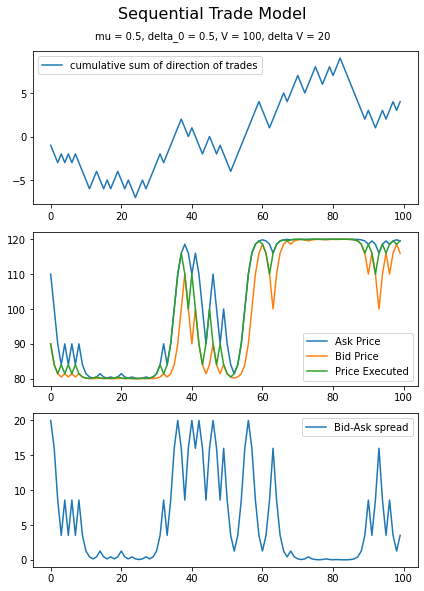

In [4]:
#plots

fig, axs = plt.subplots(3, 1, figsize=(6, 8))


axs[0].plot(pd.DataFrame({'trades': numbers}).cumsum())
axs[0].legend(['cumulative sum of direction of trades'])

axs[1].plot(prices_df[['ask','bid','executed']])
axs[1].legend(['Ask Price', 'Bid Price', 'Price Executed'])

axs[2].plot(prices_df[['spread']])
axs[2].legend(['Bid-Ask spread'])



plt.suptitle("mu = 0.5, delta_0 = 0.5, V = 100, delta V = 20", fontsize=10)
fig.text(0.5, 1, 'Sequential Trade Model', fontsize=16, ha='center')

plt.tight_layout()

plt.show()